In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

### Load dataset into a pandas dataframe

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [3]:
penguins = sns.load_dataset('penguins')

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
penguins.shape

(344, 7)

In [6]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


### Generate at least 3 data visualizations

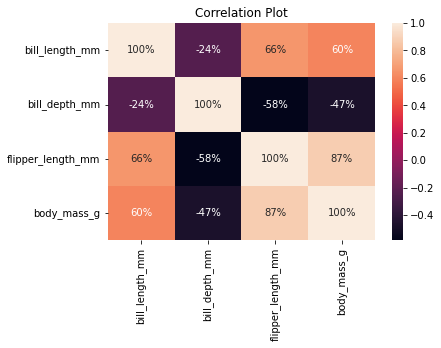

In [10]:
#correlation matrix
sns.heatmap(penguins.corr(), annot=True, fmt ='.0%')
plt.title('Correlation Plot')
plt.show()

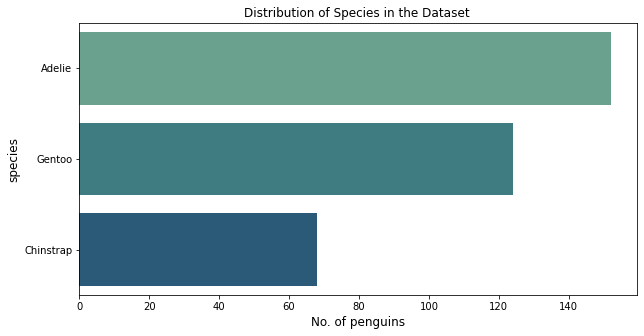

In [11]:
#Plotting the distribution of the penguins species
species_count  = penguins['species'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x= species_count.values, y = species_count.index,alpha=1,orient = 'h',palette='crest')
plt.title('Distribution of Species in the Dataset ')
plt.ylabel('species', fontsize=12)
plt.xlabel('No. of penguins', fontsize=12)
plt.show()

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

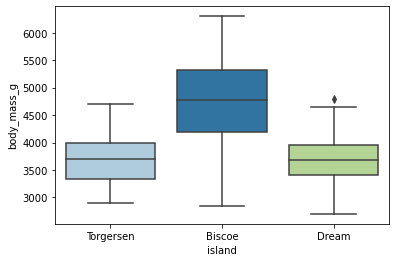

In [12]:
##Plotting the penguins mass in different island
sns.boxplot(x='island',y='body_mass_g',palette='Paired',data=penguins)

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

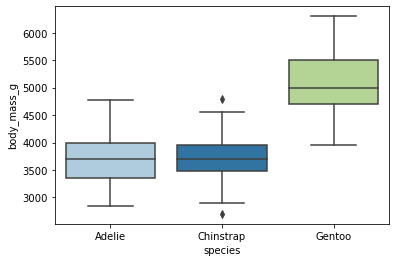

In [13]:
sns.boxplot(x='species',y='body_mass_g',palette='Paired',data=penguins)

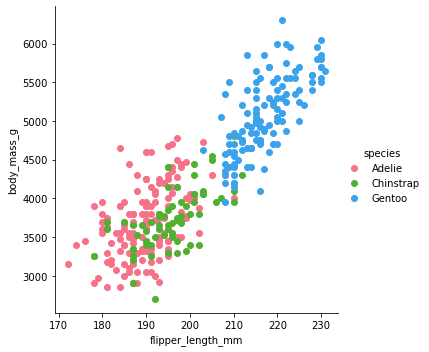

In [14]:
sns.FacetGrid(penguins, hue='species', palette='husl', size=5).map(plt.scatter, 'flipper_length_mm', 'body_mass_g').add_legend()

### Clean dataset if necessary 

<AxesSubplot:>

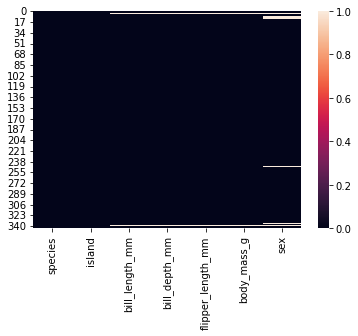

In [15]:
sns.heatmap(penguins.isna())

In [16]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [17]:
penguins=penguins.dropna(axis=0)

In [18]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [19]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
penguins.shape

(333, 7)

In [21]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [22]:
species_encoded = pd.get_dummies(penguins['species'])

In [23]:
species_encoded.head()

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0


In [24]:
island_encoded = pd.get_dummies(penguins['island'])

In [25]:
island_encoded.head()

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1


In [26]:
penguins = penguins.drop(['species','island'], axis = 1)

In [27]:
penguins = pd.concat([species_encoded,island_encoded,penguins], axis=1)

In [28]:
penguins.head()

,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,0,0,0,0,1,39.1,18.7,181.0,3750.0,Male
1,1,0,0,0,0,1,39.5,17.4,186.0,3800.0,Female
2,1,0,0,0,0,1,40.3,18.0,195.0,3250.0,Female
4,1,0,0,0,0,1,36.7,19.3,193.0,3450.0,Female
5,1,0,0,0,0,1,39.3,20.6,190.0,3650.0,Male


In [29]:
penguins['sex'] = pd.get_dummies(penguins['sex'], drop_first = True)

In [30]:
penguins['sex']

0      1
1      0
2      0
4      0
5      1
      ..
338    0
340    0
341    1
342    0
343    1
Name: sex, Length: 333, dtype: uint8

### Divide data into training and test sets

In [31]:
X = penguins.drop(penguins[penguins.columns[0:3]],axis=1)

In [32]:
y=penguins[penguins.columns[0:3]]

In [33]:
X

,Biscoe,Dream,Torgersen,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,1,39.1,18.7,181.0,3750.0,1
1,0,0,1,39.5,17.4,186.0,3800.0,0
2,0,0,1,40.3,18.0,195.0,3250.0,0
4,0,0,1,36.7,19.3,193.0,3450.0,0
5,0,0,1,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...,...
338,1,0,0,47.2,13.7,214.0,4925.0,0
340,1,0,0,46.8,14.3,215.0,4850.0,0
341,1,0,0,50.4,15.7,222.0,5750.0,1
342,1,0,0,45.2,14.8,212.0,5200.0,0


In [34]:
y.head()

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0


In [35]:
X.shape

(333, 8)

In [36]:
y.shape

(333, 3)

In [37]:
#spliting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 20)

### Perform standardization (if necessary)

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fit the models to training data

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Decision Tree Classification Report

#### Make predictions 

In [41]:
y_pred_dt = dt.predict(X_test)

In [42]:
#classification report
print(classification_report(y_test, y_pred_dt, target_names = ['Adelie', 'Chinstrap','Gentoo']))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        46
   Chinstrap       0.96      1.00      0.98        23
      Gentoo       1.00      0.97      0.98        31

   micro avg       0.98      0.98      0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100
 samples avg       0.98      0.98      0.98       100



### Perform 5 fold cross validation

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(knn, X_train, y_train, cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9913043478260869


### Random Forest Classification Report

In [45]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)

In [46]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [47]:
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf,target_names = ['Adelie', 'Chinstrap','Gentoo']))

              precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        46
   Chinstrap       0.96      1.00      0.98        23
      Gentoo       1.00      1.00      1.00        31

   micro avg       0.99      0.98      0.98       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.98      0.98       100
 samples avg       0.98      0.98      0.98       100



In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

k = 5
kf = KFold(n_splits=k)

result = cross_val_score(knn, X_train, y_train, cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9913043478260869


### comparison-logistic regression for Adelie

In [50]:
penguins.head()

,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,0,0,0,0,1,39.1,18.7,181.0,3750.0,1
1,1,0,0,0,0,1,39.5,17.4,186.0,3800.0,0
2,1,0,0,0,0,1,40.3,18.0,195.0,3250.0,0
4,1,0,0,0,0,1,36.7,19.3,193.0,3450.0,0
5,1,0,0,0,0,1,39.3,20.6,190.0,3650.0,1


In [51]:
penguins_lr=penguins.drop(['Chinstrap', 'Gentoo'], axis = 1)
penguins_lr.head()

,Adelie,Biscoe,Dream,Torgersen,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,0,0,1,39.1,18.7,181.0,3750.0,1
1,1,0,0,1,39.5,17.4,186.0,3800.0,0
2,1,0,0,1,40.3,18.0,195.0,3250.0,0
4,1,0,0,1,36.7,19.3,193.0,3450.0,0
5,1,0,0,1,39.3,20.6,190.0,3650.0,1


In [52]:
lr_X = penguins_lr[['Biscoe', 'Dream', 'Torgersen', 
                 'bill_length_mm', 'bill_depth_mm', 
                 'flipper_length_mm','body_mass_g',
                'sex']]

In [53]:
lr_y=penguins_lr[['Adelie']]

In [54]:
from sklearn.model_selection import train_test_split

#Splitting the dataset into the training and test sets - 70% of the data is used for training and 30% is used for testing
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_y, test_size = 0.30, random_state = 10)

In [55]:
#Creating a Linear Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#Training the Linear Regression model using the training data
lr.fit(lr_X_train, lr_y_train)

LogisticRegression()

In [56]:
lr_y_pred = lr.predict(lr_X_test)

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(lr_y_test,lr_y_pred)

pd.DataFrame(confusion_matrix(lr_y_test,lr_y_pred), columns = ['Actual Positive (Adelie)', 
                                                           'Actual Negative (not Adelie)'], 
             index = ['Predicted Positive (Adelie)', 
                      'Predicted Negative (not Adelie)'])

,Actual Positive (Adelie),Actual Negative (not Adelie)
Predicted Positive (Adelie),56,2
Predicted Negative (not Adelie),0,42


In [58]:
#Generate Classification Report
from sklearn.metrics import classification_report

print(classification_report(lr_y_test,lr_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.95      1.00      0.98        42

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(lr_X_train,lr_y_train)

KNeighborsClassifier()

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

k = 5
kf = KFold(n_splits=k)

result = cross_val_score(knn,lr_X_train,lr_y_train, cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7469010175763181
